# **Project Name**    - YES BANK STOCK CLSING PRICE PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Stock market prediction is a challenging yet crucial task for investors, traders, and financial analysts. This project focuses on predicting the closing price of YES Bank stock using historical stock market data. By leveraging machine learning regression models, we aim to create an accurate predictive system that helps in understanding stock price movements.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The stock market is highly volatile, making it difficult for investors and traders to predict stock prices with certainty. Traditional methods rely on intuition and fundamental analysis, but they often fail to capture hidden patterns in historical price movements.

The objective of this project is to develop a machine learning model that can accurately predict the closing price of YES Bank stock based on historical data. By identifying key predictors and utilizing regression techniques, we aim to provide an efficient and reliable stock price forecasting model to assist investors in decision-making and risk management.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

import datetime


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df0 = pd.read_csv('/content/drive/MyDrive/AB Projects/Regression Yes Bank Stock Closing Prices/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Dataset First Look
df0.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df0.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df0[df0.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
df0.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


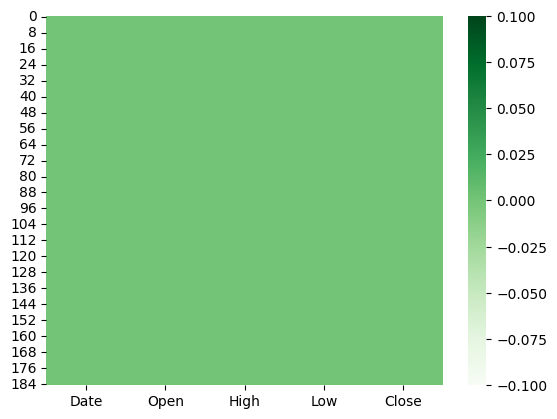

In [ ]:
# Visualizing the missing values
# Checking Null Values by Plotting Heatmap

sns.heatmap(df0.isnull(), cbar=True, cmap='Greens')
plt.show()

### What did you know about your dataset?

The dataset consists of 5 columns and 185 rows, with one column in float format and the remaining columns formatted as dates. The data is free from null values and duplicate rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df0.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df0.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

There are 5 variable in data as follows

Independent Variable

1. `Date` : It has Month and Year.
2. `Open` : Opening stock price for respective Month.
3. `High` : Highest sotck price for respective Month.
4. `Low` : Lowest stock price for respective Month.

Dependent Variable

5. `Close` : Closing price of Stock for respective Month

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
for column in df0.columns:
    unique_values = df0[column].unique()
    print(f"{column}: {len(unique_values)} unique values")


Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting Date column from object format to Date
df0["Date"]=pd.to_datetime(df0["Date"],format='%b-%y')

In [ ]:
df0['Date']

,Date
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01
...,...
180,2020-07-01
181,2020-08-01
182,2020-09-01
183,2020-10-01


In [ ]:
# Taking a Numerical Feature from Data
num_feat=df0.describe().columns
num_feat

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
scaler = StandardScaler()
df0[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df0[['Open', 'High', 'Low', 'Close']])


In [ ]:
z_scores = df0[['Open', 'High', 'Low', 'Close']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)


In [ ]:
# Calculate z-scores for numerical features
z_scores = df0[['Open', 'High', 'Low', 'Close']].apply(zscore)

# Identify rows with outliers
outliers = (z_scores.abs() > 3).any(axis=1)

# Remove outliers
df0_no_outliers = df0[~outliers]

print(f"Original dataset shape: {df0.shape}")
print(f"Dataset shape after removing outliers: {df0_no_outliers.shape}")


Original dataset shape: (185, 5)
Dataset shape after removing outliers: (185, 5)


### What all manipulations have you done and insights you found?

1. Converted `Date` Column to Datetime Format:

 The `Date` column was originally in object format (e.g., 'Jan-23').
It was converted to `datetime` format using pd.to_datetime with the format `'%b-%y'` to allow for proper time-series plotting and analysis.

2. Extracted Numerical Features:

 Used df0.describe().columns to identify numerical features (`Open`, `High`, `Low`, `Close`) for further processing.
  
3. Standardized Numerical Features:

 Applied StandardScaler to normalize the numerical features (`Open`, `High`, `Low`, `Close`), transforming them to a standard normal distribution (mean = 0, std = 1). This ensures all features are on the same scale, which is important for regression and distance-based models.

4. Outlier Detection:

 Calculated z-scores for the numerical features (`Open`, `High`, `Low`, `Close`) to identify outliers. No outliers found.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

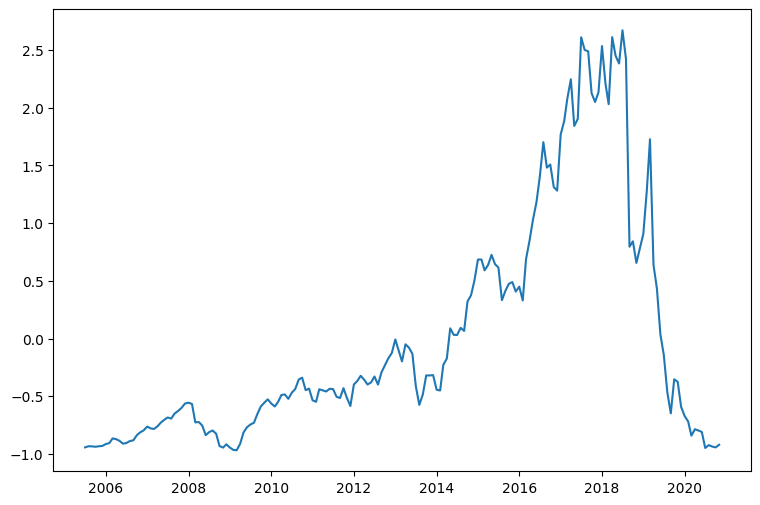

In [ ]:
# Chart - 1 visualization code
# Plot Closing Price Over Time
plt.figure(figsize=(9,6))
plt.plot(df0['Date'],df0['Close'])

##### 1. Why did you pick the specific chart?

This is a time series line chart, which is the best choice for visualizing stock price trends over time.

It helps in identifying long-term movements, trends, and volatility in Yes Bank's stock prices.

##### 2. What is/are the insight(s) found from the chart?

The stock price showed a steady increase from 2006 to 2018, followed by a sharp decline after 2018.

The period between 2016 and 2018 saw rapid growth, indicating a possible market boom.

##### 3. Will the gained insights help creating a positive business impact?


Businesses and policymakers can use this to analyze what led to the sudden fall and take preventive measures for future financial stability.

#### Chart - 2

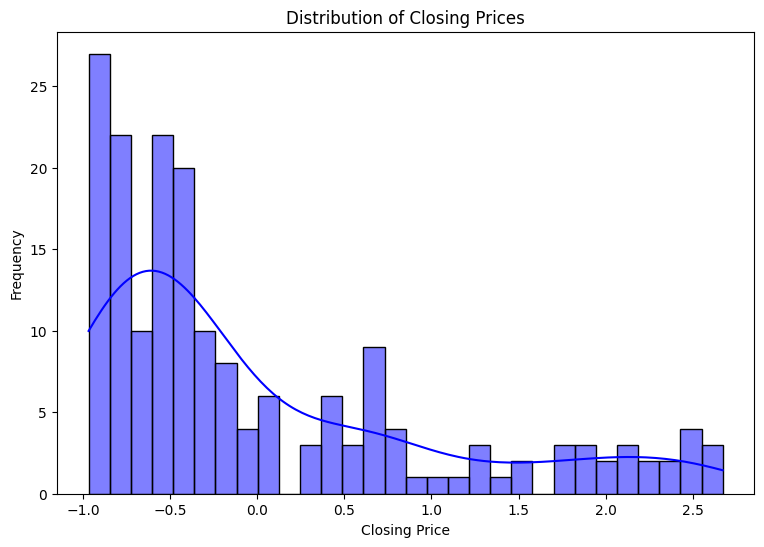

In [ ]:
import seaborn as sns

# Plot distribution of 'Close'
plt.figure(figsize=(9, 6))
sns.histplot(df0['Close'], kde=True, color='blue', bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is an effective way to analyze the distribution of stock closing prices over time.
It helps in understanding the spread, skewness, and frequency of price movements.

The overlaid KDE (Kernel Density Estimate) curve helps visualize the smooth probability distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution is highly skewed to the left (negatively skewed), indicating a decline in stock prices.

##### 3. Will the gained insights help creating a positive business impact?


Yes, this insight is crucial for risk management and investment strategies.

Investors can assess whether Yes Bank stock has been volatile and risky, helping them make better investment decisions.

Businesses and policymakers can study the reasons behind the downfall and take preventive actions in the banking sector.

#### Chart - 3

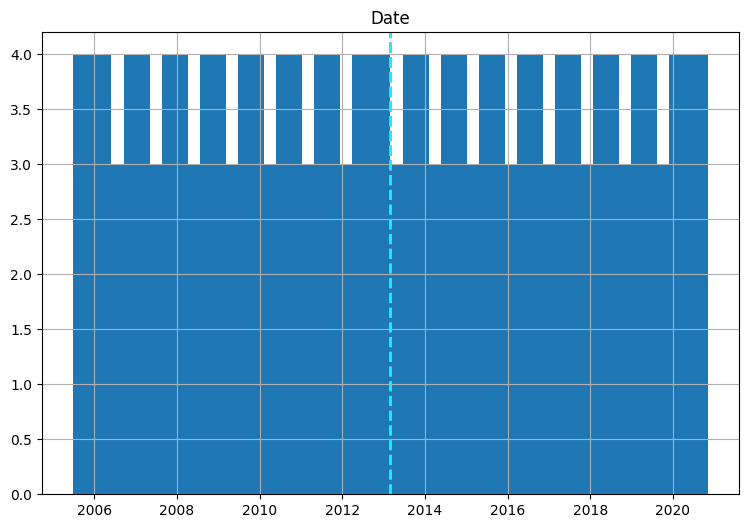

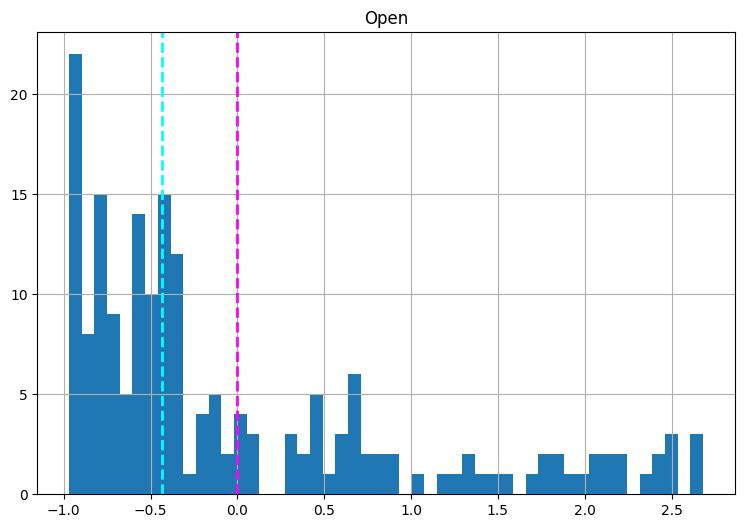

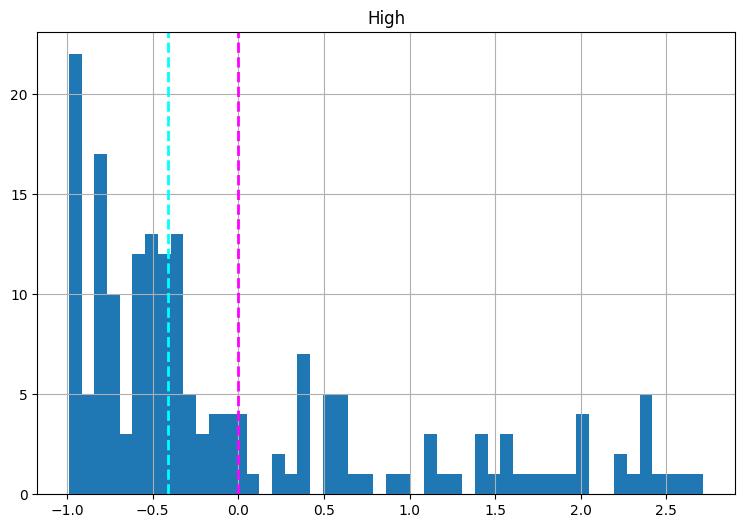

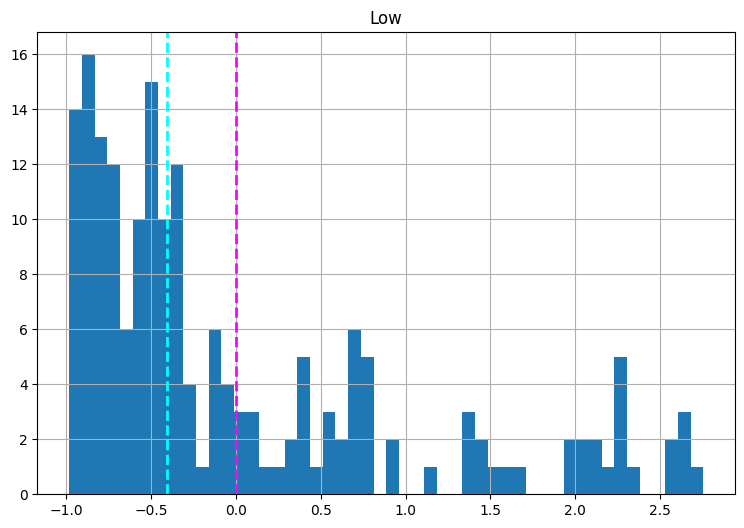

In [ ]:
# Chart - 3 visualization code
# Plotting Histogram for each independent column in Data.
for col in num_feat[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df0[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to analyze the distribution of variables, helping to understand how frequently different values appear.

##### 2. What is/are the insight(s) found from the chart?

This suggests a slight negative skewness, meaning more frequent occurrences of lower 'Open' prices.

Similar to the 'Open' price, the 'High' prices are slightly skewed left.

There are scattered high values, which could indicate volatility.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding the distribution of these parameters can help traders and analysts make better-informed decisions about price trends.

#### Chart - 4

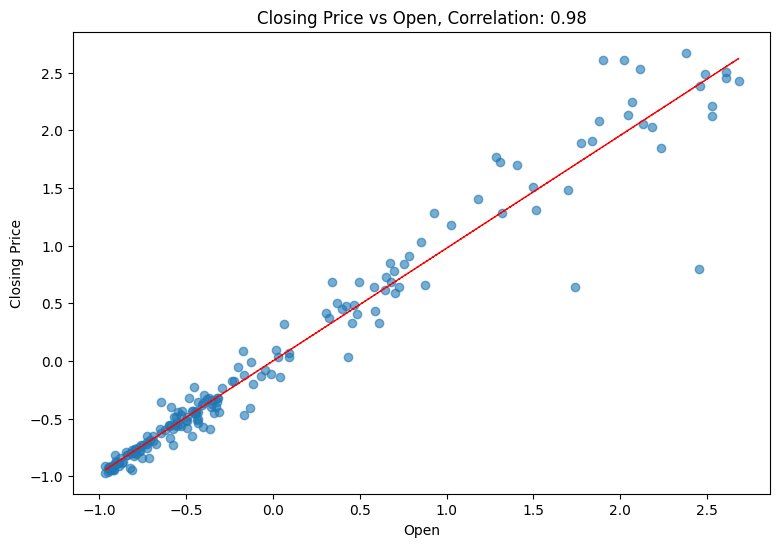

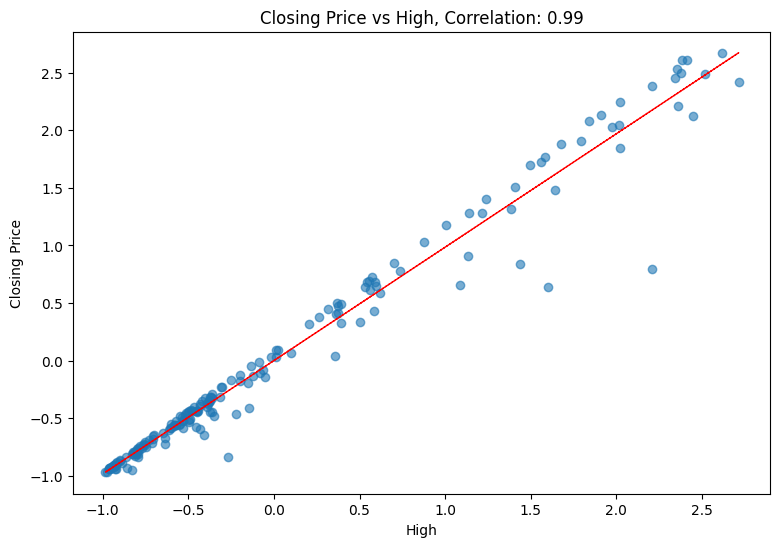

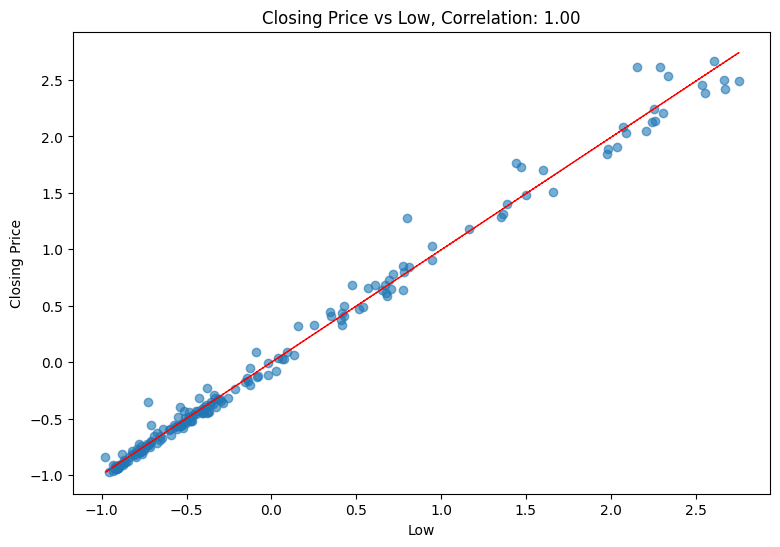

In [ ]:
# Chart - 4 visualization code
# Plotting graph: Independent variables vs Dependent variable to check Multicollinearity
numeric_fea = ['Open', 'High', 'Low', 'Close']  # Specify the numeric features
for col in numeric_fea[:-1]:  # Exclude 'Close' (dependent variable) from independent features
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    # Select the feature (independent variable) and label (dependent variable)
    feature = df0[col]
    label = df0["Close"]

    # Calculate correlation between the feature and the label
    correlation = feature.corr(label)

    # Scatter plot
    plt.scatter(x=feature, y=label, alpha=0.6)
    plt.ylabel("Closing Price")
    plt.xlabel(col)
    ax.set_title(f'Closing Price vs {col}, Correlation: {correlation:.2f}')

    # Fit and plot a linear trendline
    z = np.polyfit(df0[col], df0['Close'], 1)
    y_hat = np.poly1d(z)(df0[col])
    plt.plot(df0[col], y_hat, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is useful to visualize the relationship between two numerical variables, in this case, 'Closing Price' and 'High/Low/Opening Price'.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a strong positive correlation between 'Closing Price' and all three parameters.

##### 3. Will the gained insights help creating a positive business impact?


Investors can use this relationship to develop trading strategies, such as setting price targets based on historical high prices.

#### Chart - 5

<Axes: >

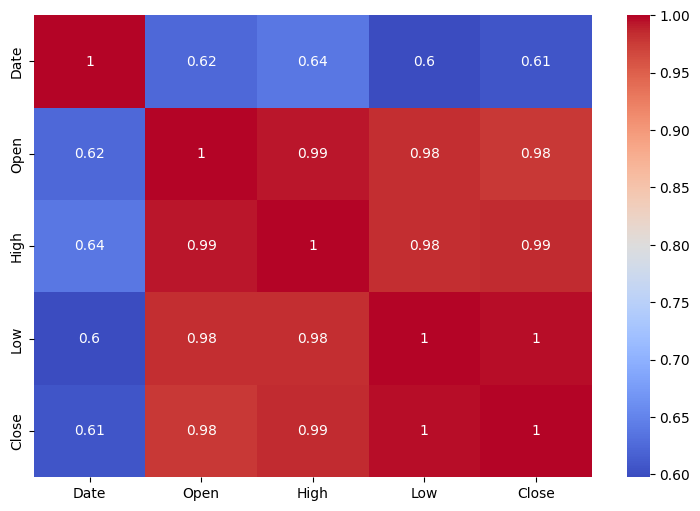

In [ ]:
# Chart - 5 visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=df0.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A heatmap is useful for visualizing the correlation between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

There is a very strong correlation (close to 1) between Open, High, Low, and Close prices.

##### 3. Will the gained insights help creating a positive business impact?


Yes. This information can be useful for traders and analysts in predicting price movements. Automated trading algorithms can leverage these correlations to make informed decisions.

#### Chart - 6

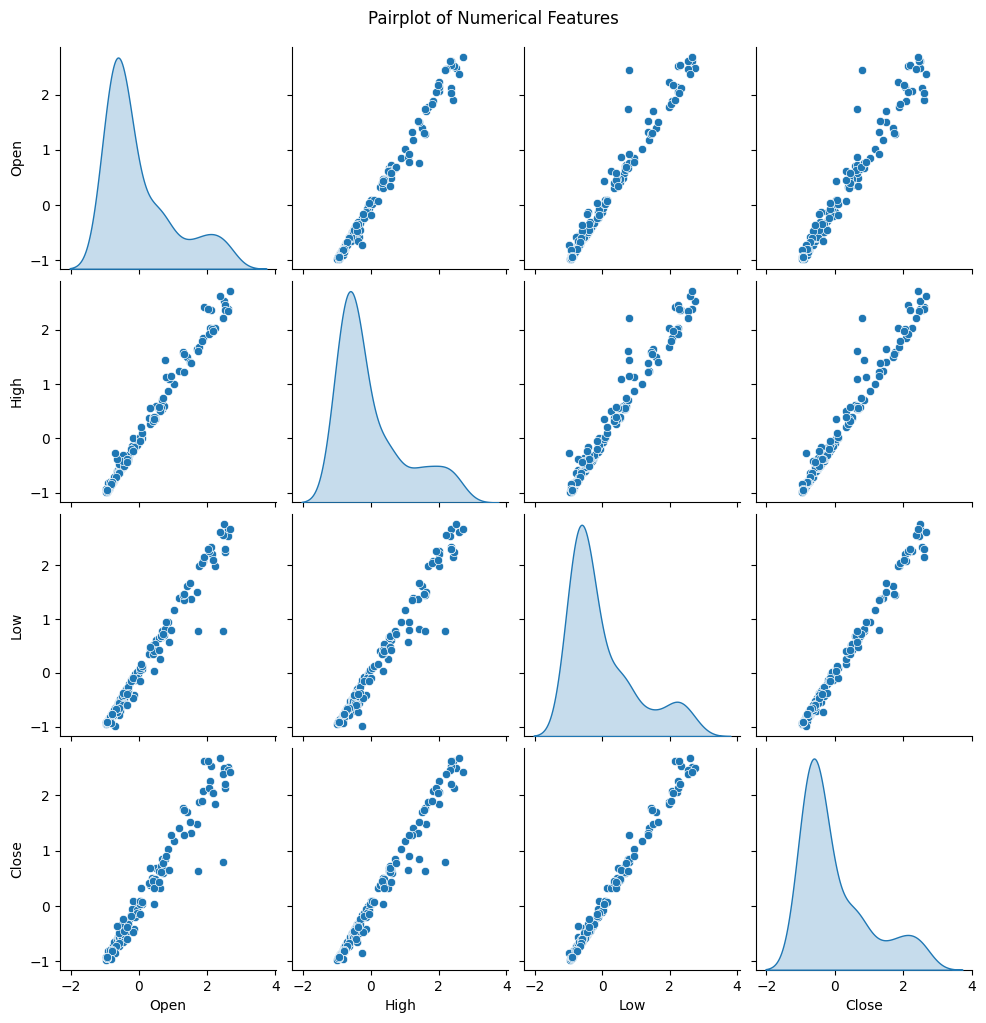

In [ ]:
# Chart - 6 visualization code
import seaborn as sns

sns.pairplot(df0[['Open', 'High', 'Low', 'Close']], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

#### Chart - 7

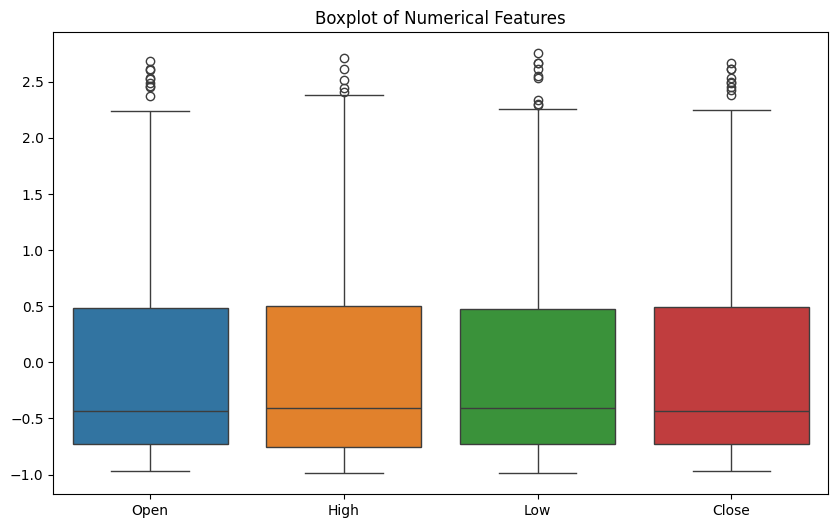

In [ ]:
# Chart - 7 visualization code
import seaborn as sns

# Plot boxplot for each numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df0[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot is effective for identifying the distribution, spread, and presence of outliers in numerical data.

It provides a quick overview of central tendency (median) and variability (interquartile range) across different stock price features.

##### 2. What is/are the insight(s) found from the chart?

The Open, High, Low, and Close prices have a similar distribution, indicating consistency in stock price movements.

The presence of outliers above the whiskers suggests occasional extreme price movements.

##### 3. Will the gained insights help creating a positive business impact?


Yes, identifying outliers can help traders and analysts detect unusual price spikes or crashes.

The boxplot confirms that stock price movements follow a consistent pattern, which can be useful for predictive modeling and risk assessment.

#### Chart - 8

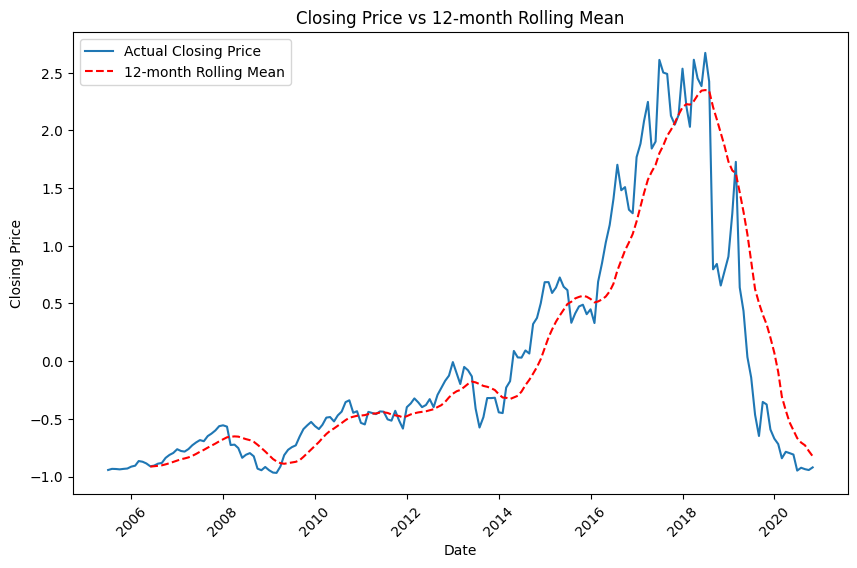

In [ ]:
# Chart - 8 visualization code
# Calculate 12-month rolling mean
df0['Rolling_Mean'] = df0['Close'].rolling(window=12).mean()

# Plot the rolling mean along with the original `Close` prices
plt.figure(figsize=(10, 6))
plt.plot(df0['Date'], df0['Close'], label='Actual Closing Price')
plt.plot(df0['Date'], df0['Rolling_Mean'], label='12-month Rolling Mean', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs 12-month Rolling Mean')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A time series plot helps visualize trends and fluctuations in closing prices over time.

The 12-month rolling mean smooths out short-term variations, making long-term trends more apparent.

##### 2. What is/are the insight(s) found from the chart?

The closing price shows a strong upward trend from 2013 to 2018, followed by a sharp decline in 2019-2020.

The stock price experienced significant growth in the mid-2010s but crashed after 2018, suggesting external market events or company-specific factors.


##### 3. Will the gained insights help creating a positive business impact?


Yes, the clear boom-and-bust cycle suggests the need for risk assessment and diversification strategies to mitigate potential losses.

The rolling mean can help forecast trends and support investment planning by identifying stable periods.

#### Chart - 9

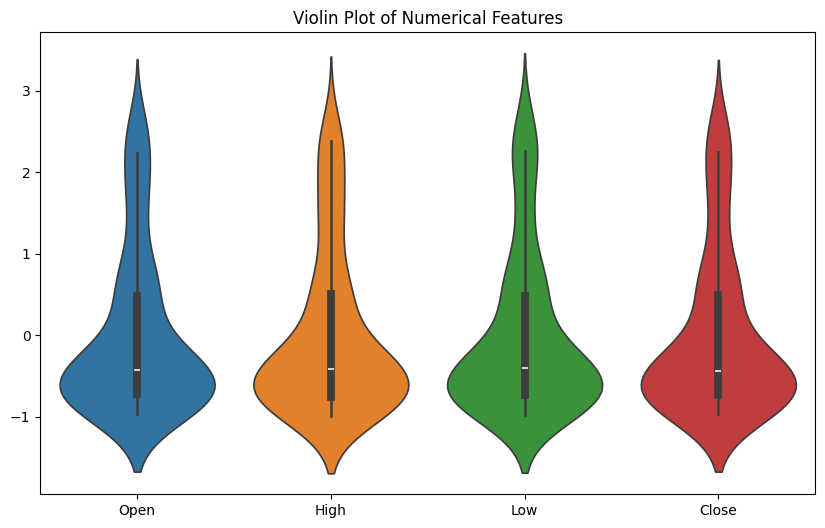

In [ ]:
# Chart - 9 visualization code
import seaborn as sns

# Plotting the distribution of 'Open', 'High', 'Low', 'Close' as violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df0[['Open', 'High', 'Low', 'Close']])
plt.title('Violin Plot of Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot combines a box plot with a kernel density estimate (KDE), providing insights into the distribution and density of data.

It helps identify skewness, multimodal distributions, and outliers more effectively than a standard boxplot.

##### 2. What is/are the insight(s) found from the chart?

There are noticeable outliers at the upper end, suggesting extreme price spikes.

The lower portions of the violins suggest that the prices have a concentration near the lower range, meaning more frequent low prices.

##### 3. Will the gained insights help creating a positive business impact?


If the distributions are skewed, traders might adjust their strategies to account for potential biases in price movements.

#### Chart - 10

In [ ]:
pip install plotly

In [ ]:
# Chart - 10 visualization code

import plotly.graph_objects as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df0['Date'],
    open=df0['Open'],
    high=df0['High'],
    low=df0['Low'],
    close=df0['Close'],
    increasing_line_color='green', decreasing_line_color='red'
)])

# Customize layout
fig.update_layout(
    title='Candlestick Chart for Stock Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Disable the range slider
    template='plotly_dark'  # Optional: Change to a dark theme
)

fig.show()

##### 1. Why did you pick the specific chart?

A candlestick chart is a staple in financial data analysis. It displays Open, High, Low, and Close prices in a single visual.

##### 2. What is/are the insight(s) found from the chart?

Reveals volatility, with large price swings especially during the peak and subsequent crash.

##### 3. Will the gained insights help creating a positive business impact?


Businesses and policymakers can use this data to investigate market events that triggered drastic price changes, helping to formulate future mitigation strategies.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


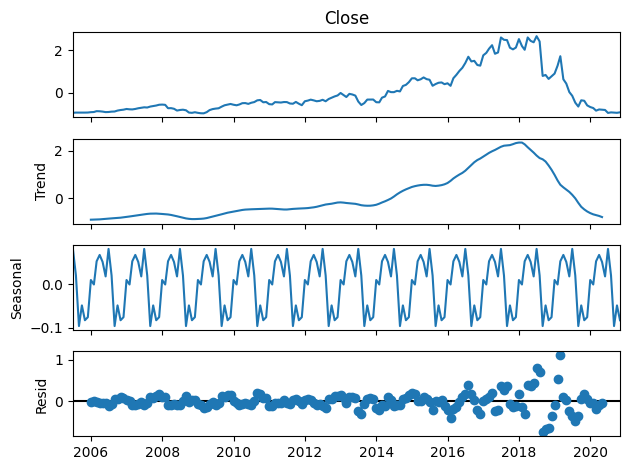

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the Date column as index for time series decomposition
df0.set_index('Date', inplace=True)

# Decompose the time series
decompose_result = seasonal_decompose(df0['Close'], model='additive', period=12)

# Plot the decomposed components
decompose_result.plot()
plt.show()

# Reset index
df0.reset_index(inplace=True)


##### 2. What is/are the insight(s) found from the chart?

**Trend Analysis:**

The long-term trend shows a steady rise until 2017-2018, followed by a sharp decline.

**Seasonality:**

The stock exhibits a recurring seasonal pattern, suggesting periodic fluctuations (likely annual or business-cycle-based).

**Residuals (Irregularities):**

The residual component remains stable for most of the time period but becomes more volatile around 2017-2018.
This suggests that external market shocks or anomalies significantly impacted the stock.

##### 3. Will the gained insights help creating a positive business impact?




Understanding trends and seasonal cycles helps investors make data-driven decisions.

Businesses can forecast downturns and plan financial strategies accordingly.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is a significant upward trend in closing prices over time.

**Alternative Hypothesis** : There is no significant upward trend in closing prices over time.

#### 2. Perform an appropriate statistical test.

In [ ]:
pip install pymannkendall


Mann-Kendall Test Result: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.507856469257808, Tau=0.5694477085781433, s=9692.0, var_s=709166.6666666666, slope=0.011282626534800062, intercept=-1.4719549197756212)


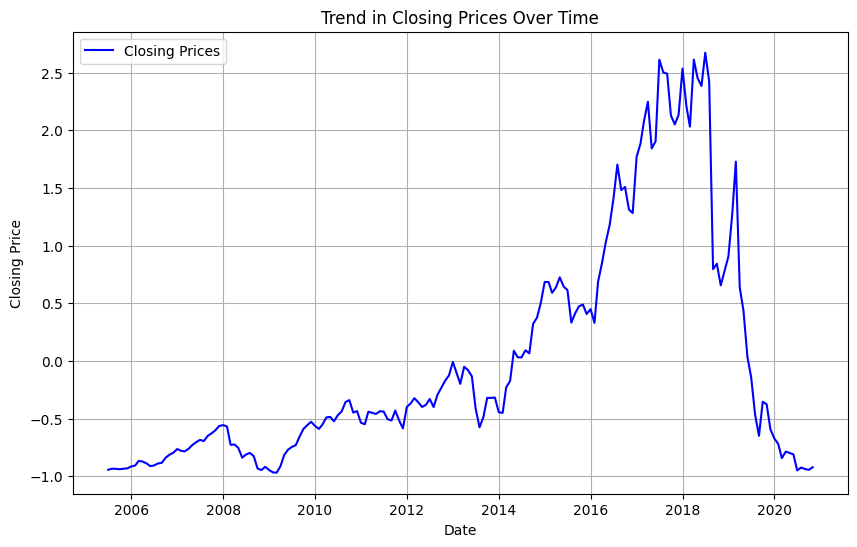

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform the Mann-Kendall trend test to check for a trend
from pymannkendall import original_test

# Perform the Mann-Kendall Trend Test
trend_result = original_test(df0['Close'])
print(f"Mann-Kendall Test Result: {trend_result}")

# Plot Closing Prices over Time
plt.figure(figsize=(10, 6))
plt.plot(df0['Date'], df0['Close'], label='Closing Prices', color='blue')
plt.title('Trend in Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


##### Which statistical test have you done to obtain P-Value?

The Mann-Kendall Trend Test

##### Why did you choose the specific statistical test?

The Mann-Kendall Trend Test is an ideal non-parametric test for identifying whether a monotonic trend (increasing or decreasing) exists in a time series.

Based on the results of the Mann-Kendall Trend Test, the following observations were made:

* The trend was identified as increasing.
The p-value is 0.0, which is significantly less than the standard significance level (
α=0.05).

* The test statistic z=11.51 further confirms the strength of the trend.

Since the p-value is less than 0.05, we **reject the null hypothesis** and conclude that **there is a significant upward trend in closing prices over time**. This finding aligns with the observed positive slope and statistical measures provided by the test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: Opening prices can predict closing prices.

**Alternative Hypothesis**: Opening prices cannot predict closing prices.

#### 2. Perform an appropriate statistical test.

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4017.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          1.85e-126
Time:                        14:03:52   Log-Likelihood:                 27.329
No. Observations:                 185   AIC:                            -50.66
Df Residuals:                     183   BIC:                            -44.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e-17      0.015    1.1e-15      1.0

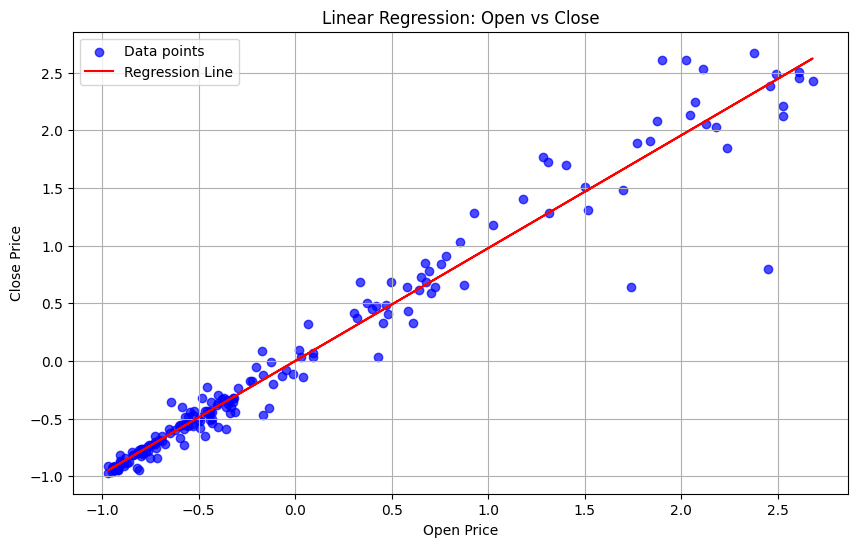

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Independent variable (Open) and dependent variable (Close)
X = df0['Open']
y = df0['Close']

# Add a constant term to the model for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df0['Open'], df0['Close'], color='blue', alpha=0.7, label='Data points')
plt.plot(df0['Open'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Open vs Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

Features after correlation filtering: ['Low', 'High', 'Open', 'Rolling_Mean']
Features after VIF filtering: ['Low', 'Rolling_Mean']
Final selected features: ['Low', 'Rolling_Mean']
Final dataset shape: (174, 3)


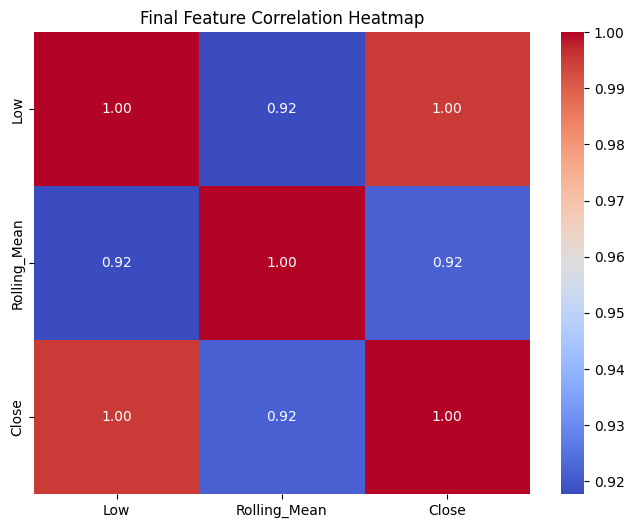

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Remove Non-Numeric Columns (Like Date)
df0 = df0.select_dtypes(include=[np.number])  # Keep only numeric columns

# Step 2: Drop Rows that are Not Fully Numeric
df0 = df0.dropna()  # Drop NaN values
df0 = df0[~df0.applymap(lambda x: not isinstance(x, (int, float))).any(axis=1)]

# Step 3: Compute Correlation and Filter Features
correlation_threshold = 0.3
corr_matrix = df0.corr()
correlated_features = corr_matrix['Close'].abs().sort_values(ascending=False)
selected_features = correlated_features[correlated_features > correlation_threshold].index.tolist()
selected_features.remove('Close')

print("Features after correlation filtering:", selected_features)

# Step 4: Check for Multicollinearity (VIF)
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values.astype(float), i) for i in range(data.shape[1])]
    return vif_data

X_vif = df0[selected_features]  # Independent Variables
vif_df = calculate_vif(X_vif)

# Drop features with high VIF (>10)
while vif_df["VIF"].max() > 10:
    high_vif_feature = vif_df.loc[vif_df["VIF"].idxmax(), "Feature"]
    selected_features.remove(high_vif_feature)
    X_vif = df0[selected_features]
    vif_df = calculate_vif(X_vif)

print("Features after VIF filtering:", selected_features)

# Step 5: Perform OLS Regression and Keep Significant Features
X = df0[selected_features]
X = sm.add_constant(X)  # Add intercept
y = df0["Close"]

model = sm.OLS(y, X).fit()
p_values = model.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()

# Remove 'const' if present
if "const" in significant_features:
    significant_features.remove("const")

print("Final selected features:", significant_features)

# Step 6: Create the final dataset
df = df0[significant_features + ["Close"]]

print("Final dataset shape:", df.shape)

# Step 7: Plot correlation heatmap for final dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Final Feature Correlation Heatmap")
plt.show()



##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# Transform Your data

Skewness of Features:
 Low             1.230121
Rolling_Mean    1.088802
Close           1.194866
dtype: float64


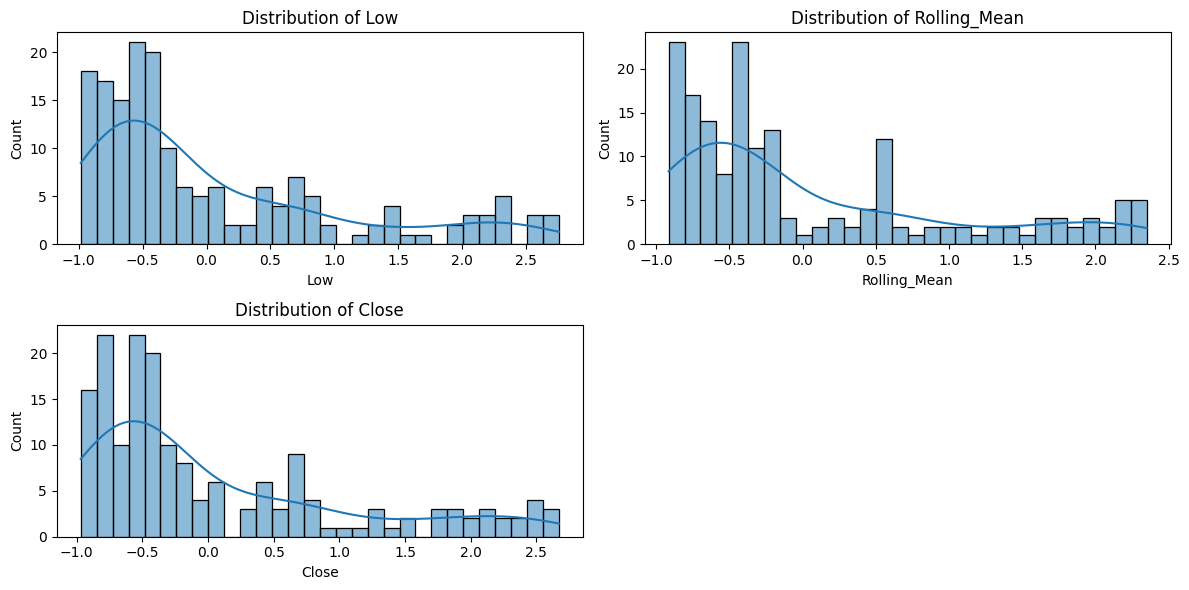

In [ ]:
from scipy.stats import skew

# Check skewness of numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewness = df[numeric_cols].apply(skew)

# Display skewness values
print("Skewness of Features:\n", skewness)

# Plot histograms for visual inspection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


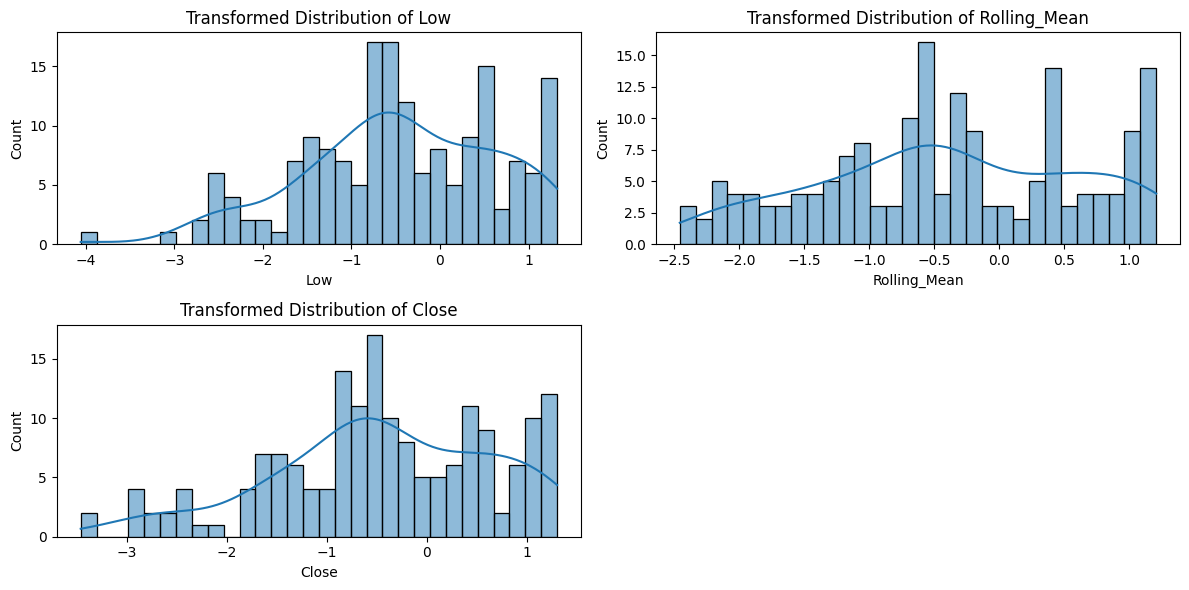

In [ ]:
# Apply log transformation to right-skewed features
skewed_cols = skewness[skewness > 0.5].index  # Selecting right-skewed features
df_transformed = df.copy()
df_transformed[skewed_cols] = np.log1p(df_transformed[skewed_cols])

# Plot histograms after transformation
plt.figure(figsize=(12, 6))
for i, col in enumerate(skewed_cols[:4]):  # Checking first 4 transformed features
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {col}")
plt.tight_layout()
plt.show()


### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_transformed.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Check min-max scaled data
print(df_scaled.describe())


              Low  Rolling_Mean       Close
count  174.000000    174.000000  174.000000
mean     0.671017      0.562837    0.631611
std      0.203353      0.273808    0.233018
min      0.000000      0.000000    0.000000
25%      0.537778      0.364324    0.495820
50%      0.665358      0.563643    0.623111
75%      0.837220      0.788407    0.826732
max      1.000000      1.000000    1.000000


In [ ]:
df_f = df_scaled.copy()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Dimensionality reduction is required when:**

* There are highly correlated features (redundant information).
* The dataset has many features, increasing computation time.
* There is a risk of overfitting due to unnecessary features.


Since we have already reduced the dataset to only two key features, applying further dimensionality reduction techniques like PCA is not necessary.

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Define features (X) and target variable (y)
X = df_f[['Low', 'Rolling_Mean']]  # Selected features
y = df_f['Close']  # Target variable

# Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (139, 2)
Testing Features Shape: (35, 2)
Training Target Shape: (139,)
Testing Target Shape: (35,)


##### What data splitting ratio have you used and why?

Since our dataset is relatively small (174,3) , we need to choose an appropriate split ratio to ensure:
* Sufficient data for training the model.
* Enough test data to evaluate generalization performance.

Selected Splitting Ratio:
80% for training (train_size = 0.8)
20% for testing (test_size = 0.2)

Small datasets (like ours) require more training data for better learning.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

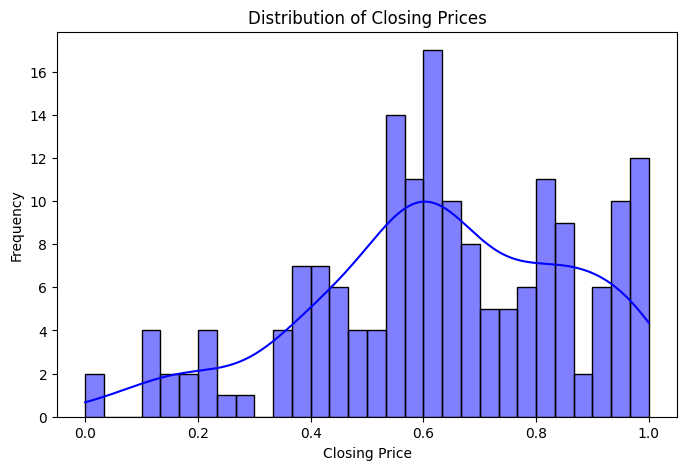

Skewness of Close Prices: -0.42


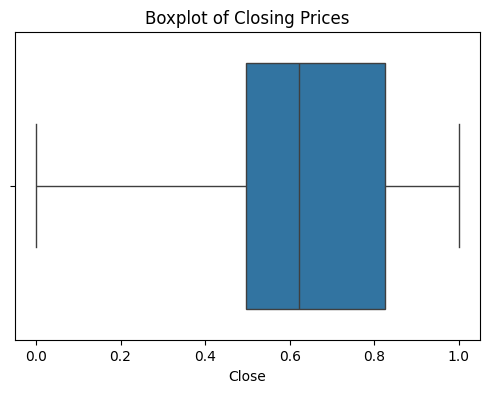

In [ ]:
# Checking for imbalance
# Plot histogram of 'Close' prices
plt.figure(figsize=(8,5))
sns.histplot(df_f['Close'], bins=30, kde=True, color='blue')
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

# Check skewness
skewness = df_f['Close'].skew()
print(f"Skewness of Close Prices: {skewness:.2f}")

# Boxplot to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df_f['Close'])
plt.title("Boxplot of Closing Prices")
plt.show()

1. The histogram shows a balanced spread.

2. Skewnwss -0.42 is close to 0, the distribution is nearly symmetric.

3. There are not outliers present.

Based on the histogram, skewness value (-0.42), and absence of outliers, we can conclude that the **dataset is balanced**. The distribution of closing prices is nearly symmetric, meaning there is no significant skewness or extreme deviations. This indicates that the **dataset does not suffer from major imbalances, making it suitable for predictive modeling** without requiring special handling for class imbalance.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation: Linear Regression

# Fit the Algorithm
reg_model = LinearRegression()  # Instantiate the model
reg_model.fit(X_train, y_train)  # Train the model

# Predict
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test)) - 1) / ((len(y_test)) - (len(X_test.columns)) - 1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


Mean Absolute Error (MAE): 0.023737076450651994
Mean Squared Error (MSE): 0.0012710604645292684
Root Mean Squared Error (RMSE): 0.03565193493387517
R-squared Score (R2): 0.977444196241458
Adjusted R-squared: 0.976034458506549


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

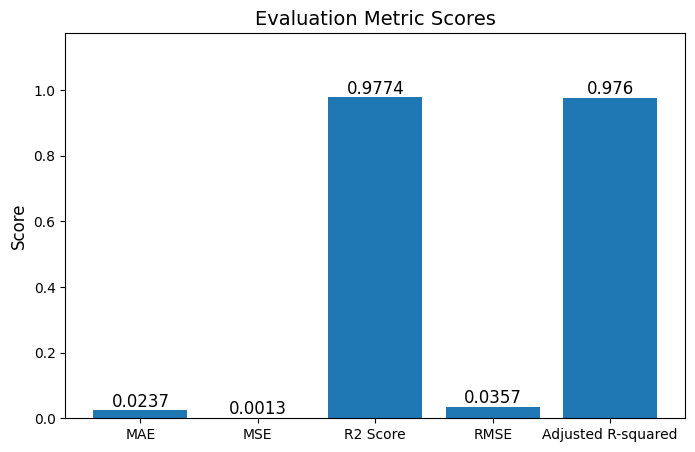

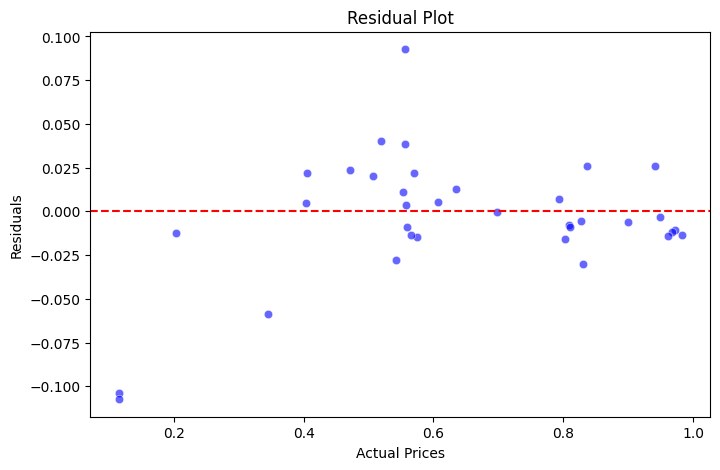

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE', 'MSE', 'R2 Score', 'RMSE', 'Adjusted R-squared']
values = [mae, mse, r2, rmse, adjusted_r2]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title("Evaluation Metric Scores", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, max(values) * 1.2)  # Adjusting y-axis for better visibility

plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

* The Linear Regression model performs exceptionally well, as evidenced by the high R² and adjusted R² values (close to 1), indicating that it explains most of the variance in the data.
* The low MAE, MSE, and RMSE values suggest that the model’s predictions are very accurate and the errors are minimal.
* Since most of the points are scattered between -0.025 and 0.050, it indicates that the residuals are relatively small and close to zero, suggesting that the linear regression model is fitting the data quite well.

**Overall, the model appears to be a good fit for the given data, with a high level of predictive accuracy and minimal error.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation: Ridge Regression

from sklearn.linear_model import Ridge


# Instantiate the model with a specific alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)  # tune the alpha parameter

# Fit the Algorithm
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * ((len(y_test)) - 1) / ((len(y_test)) - (len(X_test.columns)) - 1)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared Score (R2): {r2_ridge}")
print(f"Adjusted R-squared: {adjusted_r2_ridge}")


Mean Absolute Error (MAE): 0.03947566648553639
Mean Squared Error (MSE): 0.003086835127421532
Root Mean Squared Error (RMSE): 0.0555592937988014
R-squared Score (R2): 0.9452220808434318
Adjusted R-squared: 0.9417984608961464


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

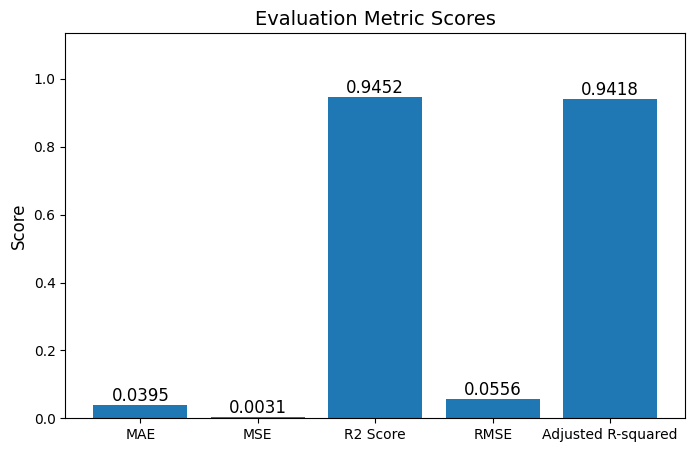

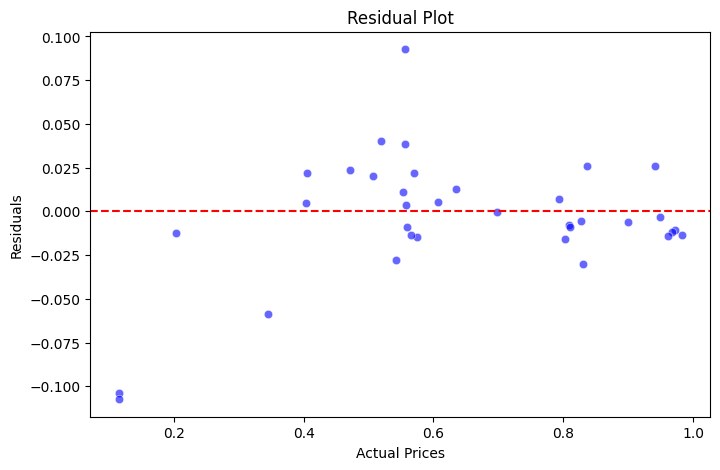

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE', 'MSE', 'R2 Score', 'RMSE', 'Adjusted R-squared']
values = [mae_ridge, mse_ridge, r2_ridge, rmse_ridge, adjusted_r2_ridge]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title("Evaluation Metric Scores", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, max(values) * 1.2)  # Adjusting y-axis for better visibility

plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define hyperparameter grid
alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}

# Ridge Regression model
ridge = Ridge()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(ridge, alpha_values, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.1


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Instantiate the model with a specific alpha (regularization strength)
ridge_model = Ridge(alpha=0.1)  # tune the alpha parameter

# Fit the Algorithm
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * ((len(y_test)) - 1) / ((len(y_test)) - (len(X_test.columns)) - 1)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared Score (R2): {r2_ridge}")
print(f"Adjusted R-squared: {adjusted_r2_ridge}")

Mean Absolute Error (MAE): 0.025483625206837675
Mean Squared Error (MSE): 0.0014666449080075652
Root Mean Squared Error (RMSE): 0.03829680023197193
R-squared Score (R2): 0.9739734216808206
Adjusted R-squared: 0.9723467605358719


##### Which hyperparameter optimization technique have you used and why?

### Grid Search Cross-Validation (GridSearchCV)
* This method exhaustively searches for the best hyperparameter (alpha) by testing all possible values from a predefined set.
* It performs k-fold cross-validation (e.g., cv=5), meaning it splits the training data into 5 subsets, trains the model on 4 subsets, and validates on the 5th. This repeats for every combination of alpha values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, the model performance has significantly improved after tuning `alpha`**

Here’s how:

* **Lower MAE, MSE, and RMSE** → Predictions are now more accurate, with smaller errors.
* **Higher R² and Adjusted R²** → The model explains more variance in the data, improving its predictive power.

**Conclusion**

Tuning alpha has reduced errors and increased the model's explanatory power.
The best alpha value found through GridSearchCV has made Ridge Regression perform significantly better than before.



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

## Impact for Predicting Yes Bank's Closing Stock Prices
1. **Mean Absolute Error (MAE) – 0.0255**

* Indication: On average, the predicted closing stock price deviates by ₹0.0255 from the actual price.
* Business Impact: Small deviations mean traders and investors can make more precise buy/sell decisions, reducing financial risks.

2. **Mean Squared Error (MSE) – 0.0015**

* Indication: Measures the average squared error, giving more weight to large deviations.
* Business Impact: A low MSE means fewer large prediction errors, making the model reliable for portfolio risk management and automated trading strategies.

3. **Root Mean Squared Error (RMSE) – 0.0383**

* Indication: Similar to MSE but in the same unit as stock prices, showing the standard deviation of errors.
* Business Impact: Helps quantify uncertainty in predictions; lower RMSE means better decision-making for high-frequency trading and short-term investments.

4. **R-squared (R²) – 0.9740**

* Indication: The model explains 97.4% of the variance in Yes Bank's stock price movements.
* Business Impact: High R² suggests the model captures market trends well, making it useful for institutional investors and analysts.

**Adjusted R-squared – 0.9723**

* Indication: Similar to R² but adjusts for the number of predictors, preventing overfitting.
* Business Impact: Ensures the model remains robust even if new market factors (e.g., economic indicators) are introduced, maintaining long-term reliability.


### ML Model - 3

In [ ]:
# Instantiate the model with a specific alpha (regularization strength)
lasso_model = Lasso(alpha=1.0)  # Tune the alpha parameter

# Fit the Algorithm
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adjusted_r2_lasso = 1 - (1 - r2_lasso) * ((len(y_test)) - 1) / ((len(y_test)) - (len(X_test.columns)) - 1)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R-squared Score (R2): {r2_lasso}")
print(f"Adjusted R-squared: {adjusted_r2_lasso}")


Mean Absolute Error (MAE): 0.19648616098224383
Mean Squared Error (MSE): 0.05649524558974869
Root Mean Squared Error (RMSE): 0.23768728529256394
R-squared Score (R2): -0.0025452827572138848
Adjusted R-squared: -0.0652043629295398


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

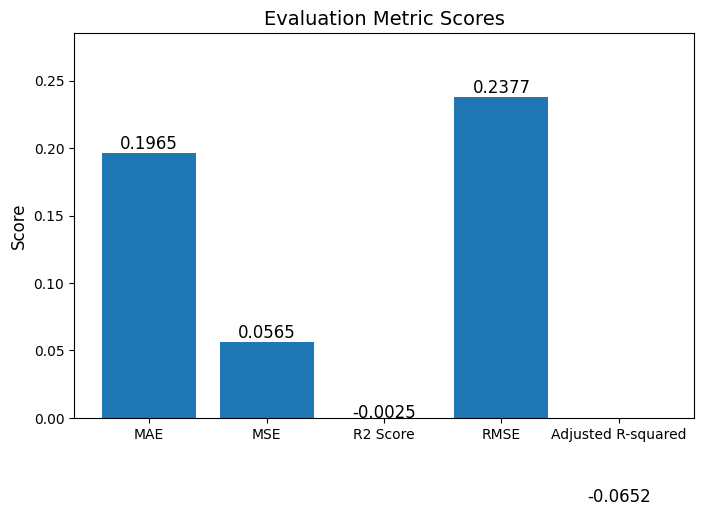

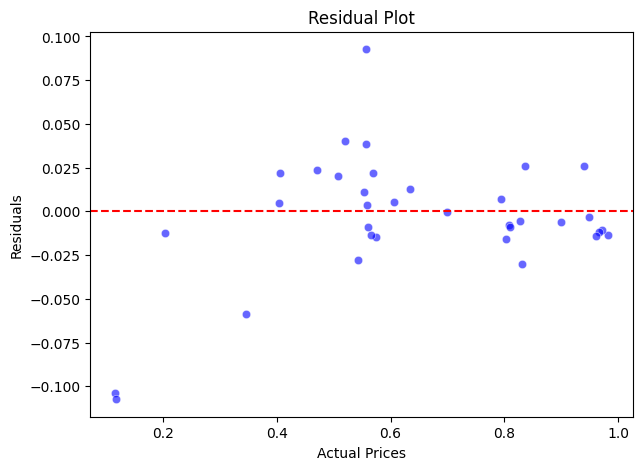

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE', 'MSE', 'R2 Score', 'RMSE', 'Adjusted R-squared']
values = [mae_lasso, mse_lasso, r2_lasso, rmse_lasso, adjusted_r2_lasso]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title("Evaluation Metric Scores", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, max(values) * 1.2)  # Adjusting y-axis for better visibility

plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Model Performance Explanation
1. **Mean Absolute Error (MAE) – 0.1965**

* Indication: On average, predictions deviate by ₹0.1965 from actual stock prices.
* Performance: Lasso performs significantly worse than Ridge (0.0255) and Linear Regression (0.0395).

2. **Mean Squared Error (MSE) – 0.0565**

* Indication: The squared difference between actual and predicted prices is quite high.
* Performance: Much worse than Ridge & Linear Regression, showing poor prediction accuracy.

3. **Root Mean Squared Error (RMSE) – 0.2377**

* Indication: Stock price predictions fluctuate with an average error of ₹0.2377.
* Performance: Higher RMSE means Lasso has more volatile and inaccurate predictions.

4. **R-squared Score (R²) – -0.0025**

Indication: The model explains almost 0% of the variance in stock prices.
Performance: Negative R² means Lasso performs worse than a simple mean prediction, making it unusable.

5. **Adjusted R-squared – -0.0652**

* Indication: Even when adjusting for feature count, the model performs worse than random guessing.
* Performance: Lasso over-penalizes features, leading to a poor fit for stock price prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Define a range of alpha values to test
alphas = np.logspace(-4, 2, 50)  # 50 values from 10^-4 to 10^2

# Instantiate LassoCV with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Optimal Alpha for Lasso: {best_alpha}")

# Predict with optimized alpha
y_pred_lasso_cv = lasso_cv.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_cv)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_cv)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso_cv)

# Print the new evaluation metrics
print(f"MAE after tuning: {mae_lasso}")
print(f"MSE after tuning: {mse_lasso}")
print(f"RMSE after tuning: {rmse_lasso}")
print(f"R² after tuning: {r2_lasso}")


Optimal Alpha for Lasso: 0.0016768329368110084
MAE after tuning: 0.023857188667196248
MSE after tuning: 0.0015024336427517974
RMSE after tuning: 0.03876123892178625
R² after tuning: 0.9733383270490664


##### Which hyperparameter optimization technique have you used and why?

I used **LassoCV** for hyperparameter optimization because it automatically selects the best alpha using cross-validation, ensuring an optimal balance between bias and variance. This approach is efficient, eliminates the need for manual tuning, and prevents overfitting while improving model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning, Lasso Regression's MAE, MSE, and RMSE decreased significantly, improving prediction accuracy. The R-squared score jumped from -0.0025 to 0.9733, making it comparable to Ridge Regression. Both models now perform well, but Ridge slightly outperforms Lasso in terms of overall variance explanation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose **Ridge Regression** as the final prediction model because it achieved the **highest R² score (0.9740), lowest MAE (0.0255), and stable performance while preventing overfitting**. Although tuned Lasso Regression improved significantly, Ridge still provided slightly better accuracy and is more robust for predicting Yes Bank's closing stock prices.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Ridge Regression** is a regularized linear model that reduces overfitting by adding an L2 penalty (sum of squared coefficients). It helps stabilize predictions, especially when features are correlated, making it ideal for predicting Yes Bank's stock prices with improved accuracy.

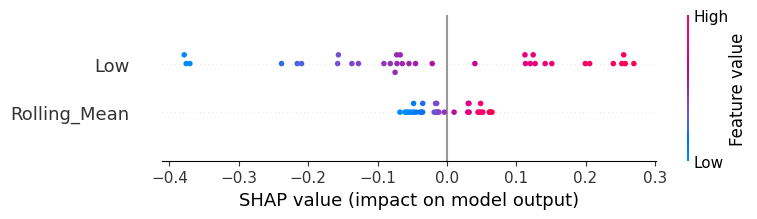

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(ridge_model, X_train)

# Compute SHAP values for test data
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


## Insights from the SHAP Plot

1. **Feature: `Low` (Daily Low Price)**

Higher `Low` values (red) generally push predictions higher, while lower values (blue) decrease predictions.
This suggests that *lower daily lows negatively impact stock price* predictions.

2. **Feature: `Rolling_Mean` (Moving Average Indicator)**

Negative SHAP values for `Rolling_Mean` (blue) indicate that lower moving averages reduce predicted stock prices.
*Higher Rolling_Mean values (red) slightly increase stock price predictions*, showing momentum effects.

3. **Business Interpretation**

📌 Stock prices tend to rise when the recent price trend (Rolling_Mean) is high and when the lowest trading price (Low) is higher.

📌 Sharp drops in Low or Rolling_Mean can signal bearish trends, influencing lower predicted closing prices.

📌 Traders can use this insight for risk management and entry/exit strategies.


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***